Introducing The Estimation Plot: This Is this the best way to display and visual data. 
    Two-Group Estimation Plot
    Benefit : All Observed values Are Shown
    Effect Size is shown
    Precision of Effect size is Shown
    Confidence and Likelihood of effect size are shown
    No flase Dichotomy arusing from Signficance Testing

In [1]:
import numpy as np
import pandas as pd
import dabest

print("We're using DABEST v{}".format(dabest.__version__))

We're using DABEST v2023.02.14


In [2]:
# df=pd.read_csv(r"C:\Users\capta\Downloads\Transwell - Transwell(1).csv")
# df=pd.read_csv(r"C:\Users\capta\Downloads\Morgan's DCL-1 and Axl Data - DCL-1 eGFP vs EK.csv")
# df2=pd.read_csv(r"C:\Users\capta\Downloads\Morgan's DCL-1 and Axl Data - Axl eGFP vs EK.csv"
# "C:\Users\capta\Downloads\Transwell - Transwell(1).csv"
# df=pd.read_csv(r"C:\Users\capta\Downloads\Transwell - Sheet5(1).csv")
# df=pd.read_csv(r"C:\Users\capta\Downloads\Morgan's DCL-1 and Axl Data - Sheet8.csv")
df=pd.read_csv(r"C:\Users\capta\Downloads\Transwell - Sheet7(4).csv")
df.head()
# df2.head()

,HL60 1uM fMLP,Cell Migration,Normalized,Average,Unnamed: 4,HL60 No fMLP,Cell Migration.1,Normalized.1,Average.1,Unnamed: 9,HL60 eGFP fMLP,HL60 E62K fMLP,Unnamed: 12,HL60 eGFP Control,HL60 E62K Control
0,HL60 eGFP,34,0.889587,#REF!,NaN,HL60 eGFP,18,1.307190,#REF!,NaN,0.889587,0.549451,NaN,1.307190,1.379811
1,HL60 eGFP,31,0.811094,NaN,NaN,HL60 eGFP,25,1.815541,NaN,NaN,0.811094,0.654108,NaN,1.815541,0.580973
2,HL60 eGFP,29,0.758765,NaN,NaN,HL60 eGFP,14,1.016703,NaN,NaN,0.758765,0.523286,NaN,1.016703,1.016703
3,HL60 eGFP,49,1.282051,NaN,NaN,HL60 eGFP,11,0.798838,NaN,NaN,1.282051,0.497122,NaN,0.798838,0.798838
4,HL60 eGFP,44,1.151230,NaN,NaN,HL60 eGFP,7,0.508351,NaN,NaN,1.151230,0.340136,NaN,0.508351,0.653595


In [11]:
# df2=pd.read_csv(r"C:\Users\capta\Downloads\Morgan's DCL-1 and Axl Data - Axl eGFP vs EK.csv")
# df2.head()

In [28]:
# two_groups_unpaired_ci90= (df,("HL60 eGFP-Axl", "HL60 E62K-Axl"))

In [3]:
two_groups_unpaired = dabest.load(df, idx=("HL60 eGFP Control", "HL60 E62K Control"), resamples=9)
two_groups_unpaired

DABEST v2023.02.14
                  
Good morning!
The current time is Thu May 25 11:25:05 2023.

Effect size(s) with 95% confidence intervals will be computed for:
1. HL60 E62K Control minus HL60 eGFP Control

9 resamples will be used to generate the effect size bootstraps.

In [4]:
two_groups_unpaired_ci90 = dabest.load(df, idx=("HL60 eGFP Control", "HL60 E62K Control"), ci=95)
two_groups_unpaired_ci90

# Data Shape Is Worng Must Place Axl eGFP and Axl E62K in different bins
# HL60 eGFP-Axl, HL60 E62K-Axl

DABEST v2023.02.14
                  
Good morning!
The current time is Thu May 25 11:25:08 2023.

Effect size(s) with 95% confidence intervals will be computed for:
1. HL60 E62K Control minus HL60 eGFP Control

5000 resamples will be used to generate the effect size bootstraps.

In [5]:
two_groups_unpaired.mean_diff

C:\Users\capta\anaconda3\lib\site-packages\dabest\_classes.py:2042: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(err_temp.substitute(lim_type="lower",
C:\Users\capta\anaconda3\lib\site-packages\dabest\_classes.py:2047: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(err_temp.substitute(lim_type="upper",


DABEST v2023.02.14
                  
Good morning!
The current time is Thu May 25 11:25:12 2023.

The unpaired mean difference between HL60 eGFP Control and HL60 E62K Control is -0.186 [95%CI -0.323, -0.0888].
The p-value of the two-sided permutation t-test is 0.273, calculated for legacy purposes only. 

9 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis ofzero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.mean_diff.statistical_tests`

In [6]:
pd.options.display.max_columns = 50

two_groups_unpaired.mean_diff.results

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,bca_interval_idx,pct_low,pct_high,pct_interval_idx,bootstraps,resamples,random_seed,permutations,pvalue_permutation,permutation_count,permutations_var,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,HL60 eGFP Control,HL60 E62K Control,9,9,mean difference,None,-0.185589,95,-0.322763,-0.08876,"(1, 8)",-0.338901,-0.08876,"(0, 8)","[-0.2017267811222222, -0.18558863856666674, -0...",9,12345,"[0.1694504960555555, -0.2662793511222221, -0.2...",0.2726,5000,"[0.024172054392734708, 0.021535103003947342, 0...",0.249523,1.20264,0.246611,1.20264,0.263187,53.5


In [7]:
two_groups_unpaired.mean_diff.statistical_tests

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,pvalue_permutation,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,HL60 eGFP Control,HL60 E62K Control,9,9,mean difference,None,-0.185589,95,-0.322763,-0.08876,0.2726,0.249523,1.20264,0.246611,1.20264,0.263187,53.5


In [8]:
two_groups_unpaired.hedges_g

C:\Users\capta\anaconda3\lib\site-packages\dabest\_classes.py:2042: UserWarning: The lower limit of the interval was in the bottom 10 values. The result should be considered unstable.
  warnings.warn(err_temp.substitute(lim_type="lower",
C:\Users\capta\anaconda3\lib\site-packages\dabest\_classes.py:2047: UserWarning: The upper limit of the interval was in the top 10 values. The result should be considered unstable.
  warnings.warn(err_temp.substitute(lim_type="upper",


DABEST v2023.02.14
                  
Good morning!
The current time is Thu May 25 11:25:22 2023.

The unpaired Hedges' g between HL60 eGFP Control and HL60 E62K Control is -0.54 [95%CI -0.668, -0.393].
The p-value of the two-sided permutation t-test is 0.273, calculated for legacy purposes only. 

9 bootstrap samples were taken; the confidence interval is bias-corrected and accelerated.
Any p-value reported is the probability of observing theeffect size (or greater),
assuming the null hypothesis ofzero difference is true.
For each p-value, 5000 reshuffles of the control and test labels were performed.

To get the results of all valid statistical tests, use `.hedges_g.statistical_tests`

In [9]:
two_groups_unpaired.hedges_g.results

,control,test,control_N,test_N,effect_size,is_paired,difference,ci,bca_low,bca_high,bca_interval_idx,pct_low,pct_high,pct_interval_idx,bootstraps,resamples,random_seed,permutations,pvalue_permutation,permutation_count,permutations_var,pvalue_welch,statistic_welch,pvalue_students_t,statistic_students_t,pvalue_mann_whitney,statistic_mann_whitney
0,HL60 eGFP Control,HL60 E62K Control,9,9,Hedges' g,None,-0.539861,95,-0.66775,-0.392859,"(3, 8)",-1.214662,-0.392859,"(0, 8)","[-0.6584357660130072, -1.2146618279928294, -0....",9,12345,"[0.4892519175801264, -0.8145363809740879, -0.8...",0.273,5000,"[0.024172054392734708, 0.021535103003947342, 0...",0.249523,1.20264,0.246611,1.20264,0.263187,53.5


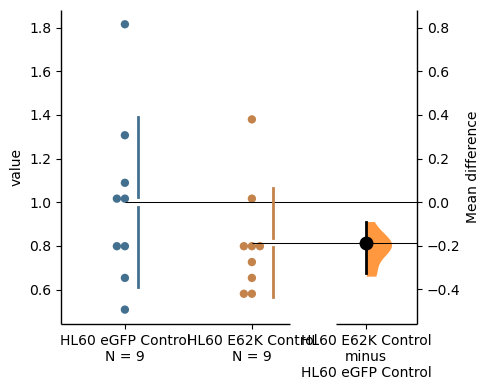

In [10]:
two_groups_unpaired.mean_diff.plot();

In [11]:
# multi_2group = dabest.load(df, idx=(("HL60 CD302 eGFP ", "HL60 CD302 E62K",),("HL60 eGFP-Axl ", "HL60 E62K-Axl")))